In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

/home/vaile/miniconda3/lib/python3.12/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/vaile/miniconda3/lib/python3.12/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from '/home/vaile/miniconda3/lib/python3.12/site-packages/hockey/hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [7]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [8]:
info, env.get_info_agent_two()

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0037968292236328126},
 {'winner': -1,
  'reward_closeness_to_puck': -0.2598055351330323,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0037968292236328126})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [9]:
env.close()

# Train Shooting

In [10]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

AttributeError: type object 'HockeyEnv' has no attribute 'TRAIN_SHOOTING'

In [11]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

error: display Surface quit

In [ ]:
env.close()

# Train DEFENDING

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Using discrete actions

In [12]:
import random

In [13]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

AttributeError: type object 'HockeyEnv' has no attribute 'TRAIN_SHOOTING'

In [14]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

error: display Surface quit

In [15]:
env.close()

# Hand-crafted Opponent

In [16]:
env = h_env.HockeyEnv()

In [17]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [18]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [19]:
np.mean(obs_buffer,axis=0)

array([-3.00637722, -0.01520795,  0.03531432, -0.07678107, -0.16213581,
        0.1795366 ,  2.98251374,  0.11488631, -0.02895056, -0.00468475,
        0.07795004,  0.02120797, -0.68075777, -0.08392287, -0.11701156,
       -0.26144141,  0.83665339,  0.        ])

In [20]:
np.std(obs_buffer,axis=0)

array([ 0.69986279,  1.06493535,  0.65314476,  3.92898491,  6.22662474,
        3.54820889,  0.83709532,  0.33334781,  0.12855654,  3.41757038,
        1.4090005 ,  0.6942286 ,  1.87926993,  1.64854457,  8.2659594 ,
       12.37345526,  2.95672829,  0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [21]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [22]:
import pylab as plt

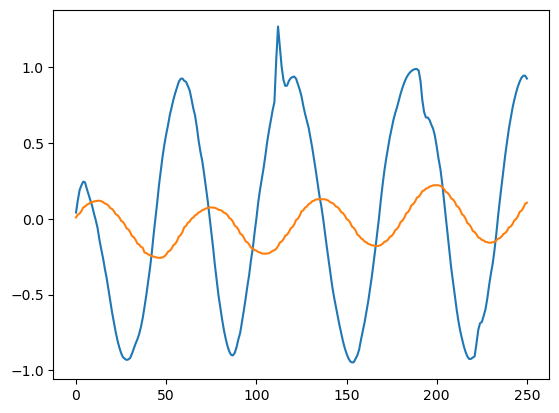

In [23]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

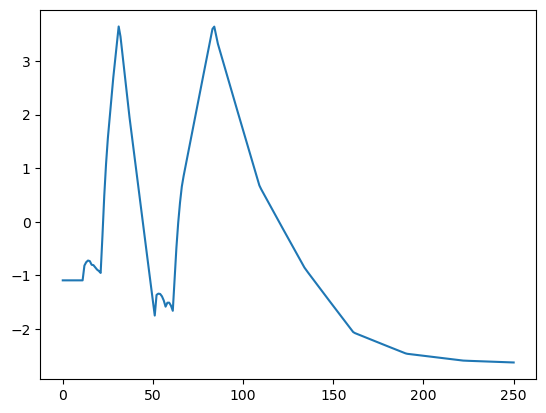

In [24]:
plt.plot(obs_buffer[:,12])

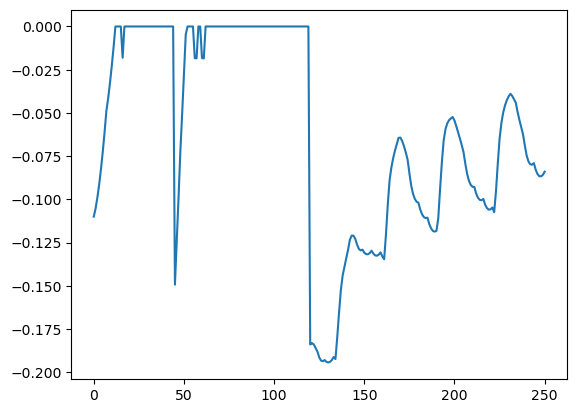

In [25]:
plt.plot(reward_buffer[:])

In [26]:
np.sum(reward_buffer)

-15.113178073563795

In [27]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': -0.0839985005763039,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -9.72580909729004e-06},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 9.72580909729004e-06},
 -0.0839985005763039,
 0.0)

In [28]:
env.close()

# Human Opponent

In [ ]:
env = h_env.HockeyEnv()

In [ ]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


In [ ]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


In [ ]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [ ]:
env.close()

# Check side consistency

In [36]:
env = h_env.HockeyEnv()

In [37]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [ ]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [ ]:
obs_buffer.shape

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

In [ ]:
winner_buffer

In [ ]:
np.mean(winner_buffer,axis=0)

In [ ]:
np.std(winner_buffer,axis=0)

In [ ]:
np.sum(reward_buffer), np.sum(reward2_buffer)

In [ ]:
env.close()